In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as linear_model
import scipy.stats as stats
%matplotlib inline

In [59]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df = df.drop(df.index[0:4]).drop(df.index[-3:])
df.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','agg_assault',
                       'property_crime','burglary','larceny','motor_theft','arson']
df = df.drop('rape_revised', axis=1)
df.index = range(len(df))
df.head()

,city,population,violent_crime,murder,rape_legacy,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN


In [60]:
df.isnull().sum()

city                0
population          0
violent_crime       0
murder              0
rape_legacy         0
robbery             0
agg_assault         0
property_crime      0
burglary            0
larceny             0
motor_theft         0
arson             161
dtype: int64

In [61]:
features = pd.DataFrame(df['population'])

In [62]:
features['population_sq'] = df.population**2
features['murder'] = np.where(df.murder>0, 1, 0)
features['robbery'] = np.where(df.robbery>0, 1, 0)
features.head()

,population,population_sq,murder,robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,1,1
4,6388,40806544,0,1


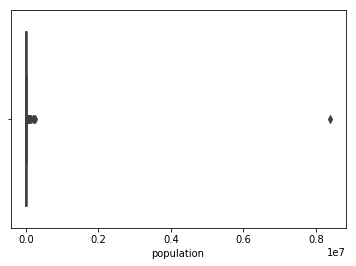

In [63]:
features.population = features.population.astype(float)
sns.boxplot(features['population'])

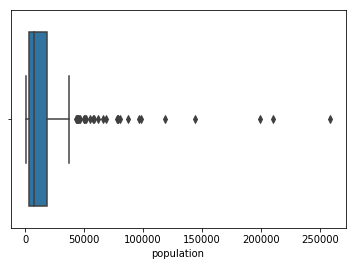

In [64]:
features[features.population == features.population.max()]
dropped = features.drop([216])
sns.boxplot(dropped['population'])

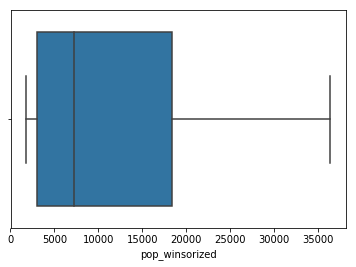

In [67]:
features['pop_winsorized'] = stats.mstats.winsorize(features.population, limits=.1)
sns.boxplot(features.pop_winsorized)

In [66]:
features['pop_sq_winsorized'] = features.pop_winsorized**2
features

,population,population_sq,murder,robbery,pop_winsorized,pop_sq_winsorized
0,1861.0,3463321,0,0,1861.0,3.463321e+06
1,2577.0,6640929,0,0,2577.0,6.640929e+06
2,2846.0,8099716,0,0,2846.0,8.099716e+06
3,97956.0,9595377936,1,1,36369.0,1.322704e+09
4,6388.0,40806544,0,1,6388.0,4.080654e+07
5,4089.0,16719921,0,1,4089.0,1.671992e+07
6,1781.0,3171961,0,0,1781.0,3.171961e+06
7,118296.0,13993943616,1,1,36369.0,1.322704e+09
8,9519.0,90611361,0,1,9519.0,9.061136e+07
9,18182.0,330585124,0,1,18182.0,3.305851e+08
